# Exploring GDP and life expectancy of 6 countries in the period 2000-2015

## Questions

- Has life expectancy increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

### Import of necessary libs.

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Importing and exploring data (data cleaning incl.)

In [61]:
df = pd.read_csv('all_data.csv')
countries=np.unique(df.Country)
years=np.unique(df.Year)
print(df.head())
#renaming columns
columns_names_adj = {'Life expectancy at birth (years)': 'LEABY'}
df.rename(columns=columns_names_adj,inplace=True)
print(df.info())
print(list_countries, len(list_countries))
print(np.max(df.Year))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'] 6
2015


## Exploratory plots

### Distribution of GDP values

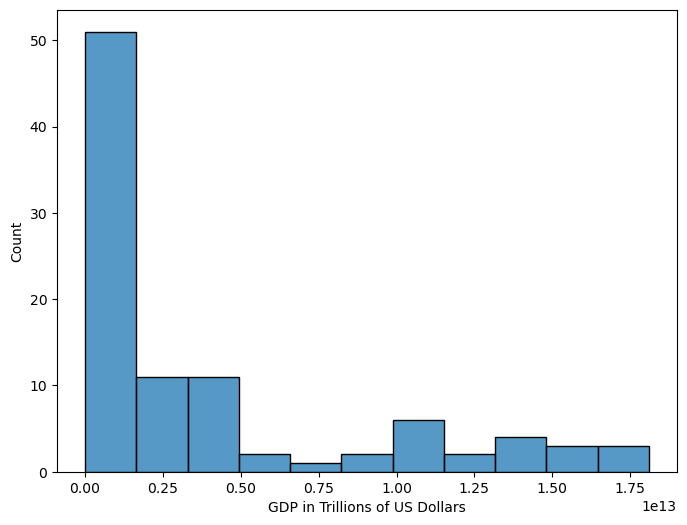

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(df.GDP)
plt.xlabel('GDP in Trillions of US Dollars')
plt.show()
plt.clf()

### Distribution of LEABY values

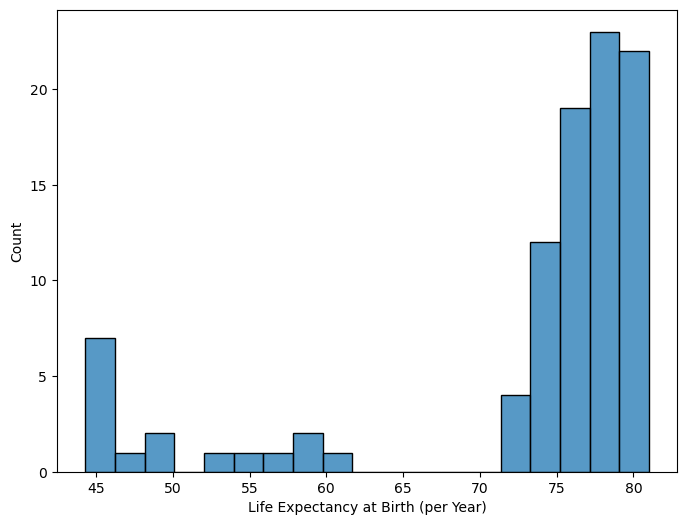

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(8,6))
sns.histplot(df.LEABY)
plt.xlabel('Life Expectancy at Birth (per Year)')
plt.show()
plt.clf()

### Average of LEABY values per Country

In [72]:
dfMeans = df.drop('Year', axis= 1).groupby('Country').mean().reset_index()

In [73]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


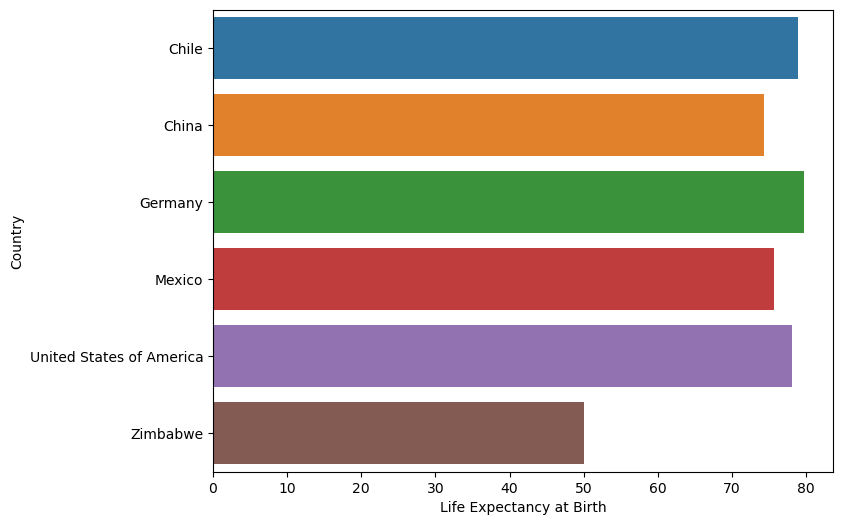

<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(x='LEABY', y='Country', data=dfMeans)
plt.xlabel('Life Expectancy at Birth')
plt.show()
plt.clf()

### Average of GDP values per Country

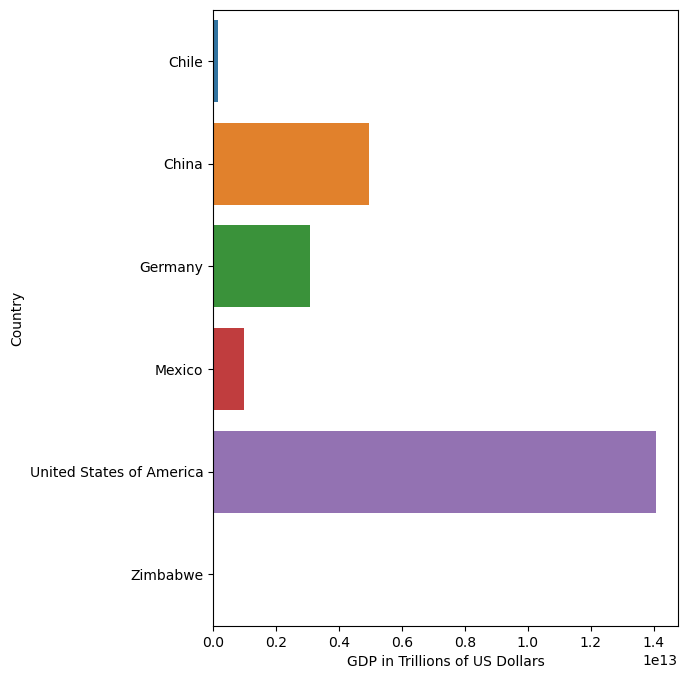

<Figure size 640x480 with 0 Axes>

In [86]:
plt.figure(figsize=(6,8))
sns.barplot(x='GDP', y='Country', data=dfMeans)
plt.xlabel('GDP in Trillions of US Dollars')
plt.show()
plt.clf()

## VIolin plots

The violin plot shows the shape of the distribution. It completes the comprehension of Bar plots.

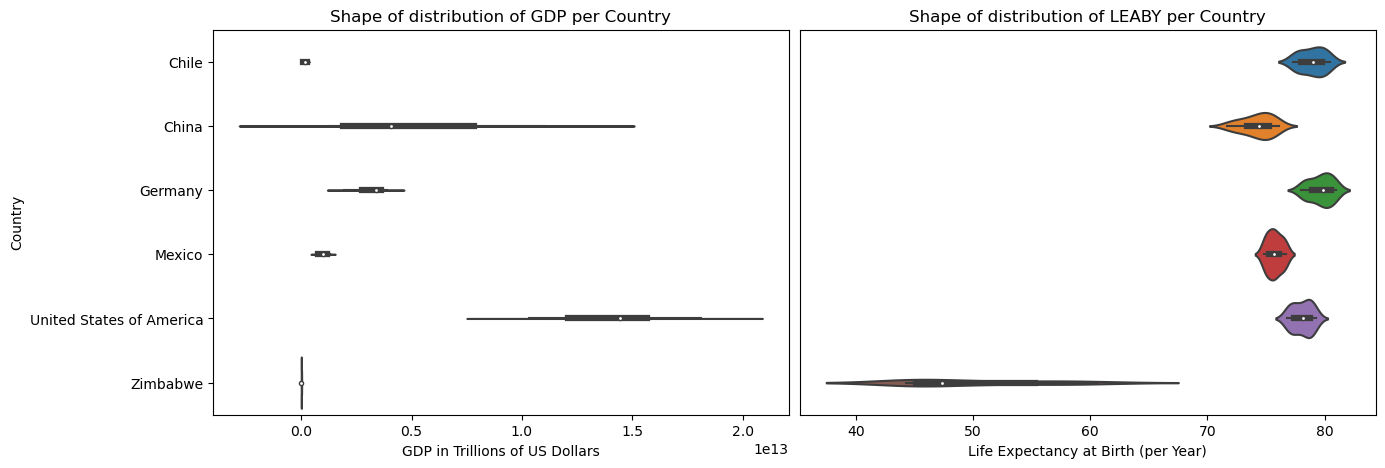

<Figure size 640x480 with 0 Axes>

In [106]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.violinplot(x=df.GDP, y=df.Country)
ax1.set_xlabel('GDP in Trillions of US Dollars')
ax1.set_title('Shape of distribution of GDP per Country')

ax2 = plt.subplot(1,2,2)
sns.violinplot(x=df.LEABY, y=df.Country)
ax2.set_xlabel('Life Expectancy at Birth (per Year)')
ax2.set_title('Shape of distribution of LEABY per Country')
ax2.set_ylabel('')
ax2.set_yticks([])
plt.subplots_adjust(wspace=0.02)
plt.show()
plt.clf()

## Swarm plots

Swarm plots also show distribution. They complete the comprehension of Bar and Violin plots.

WARNING: to avoid output error, first swarm plot has been converted to stripplot

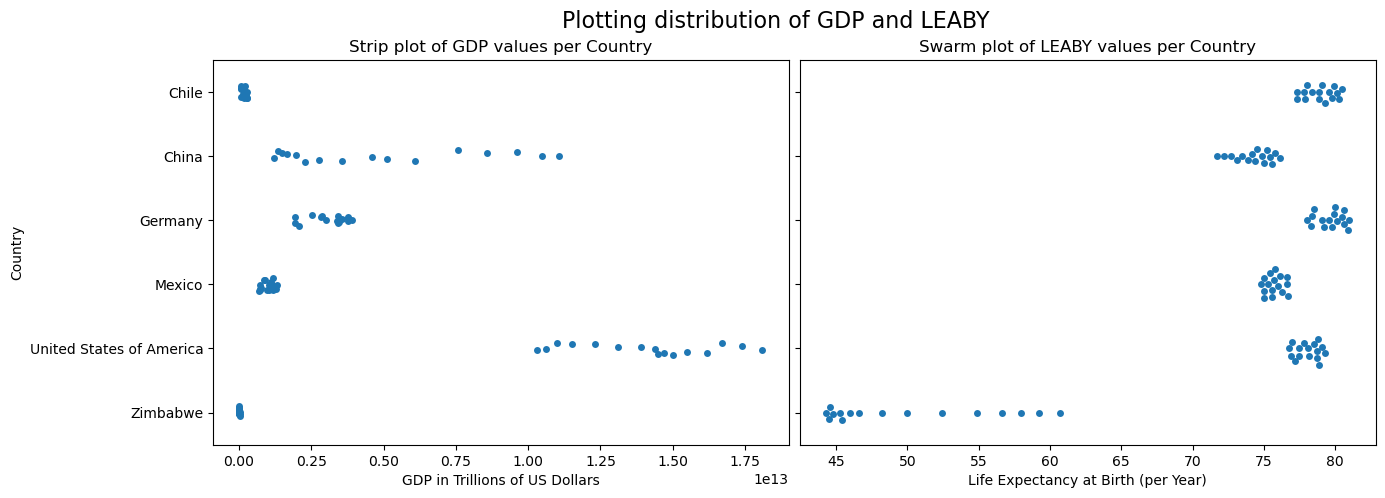

<Figure size 640x480 with 0 Axes>

In [116]:
fig, axs = plt.subplots(1, 2,sharey=True, figsize=(15, 5))
axs[0] = sns.stripplot(x=df.GDP, y=df.Country, ax=axs[0])
axs[0].set_xlabel('GDP in Trillions of US Dollars')
axs[0].set_title('Strip plot of GDP values per Country')
axs[1] = sns.swarmplot(x=df.LEABY, y=df.Country, ax=axs[1])
axs[1].set_xlabel('Life Expectancy at Birth (per Year)')
axs[1].set_title('Swarm plot of LEABY values per Country')
fig.suptitle('Plotting distribution of GDP and LEABY',fontsize=16)
plt.subplots_adjust(wspace=0.02)
plt.show()
plt.clf()

### Overlapping of violin and swarmplots

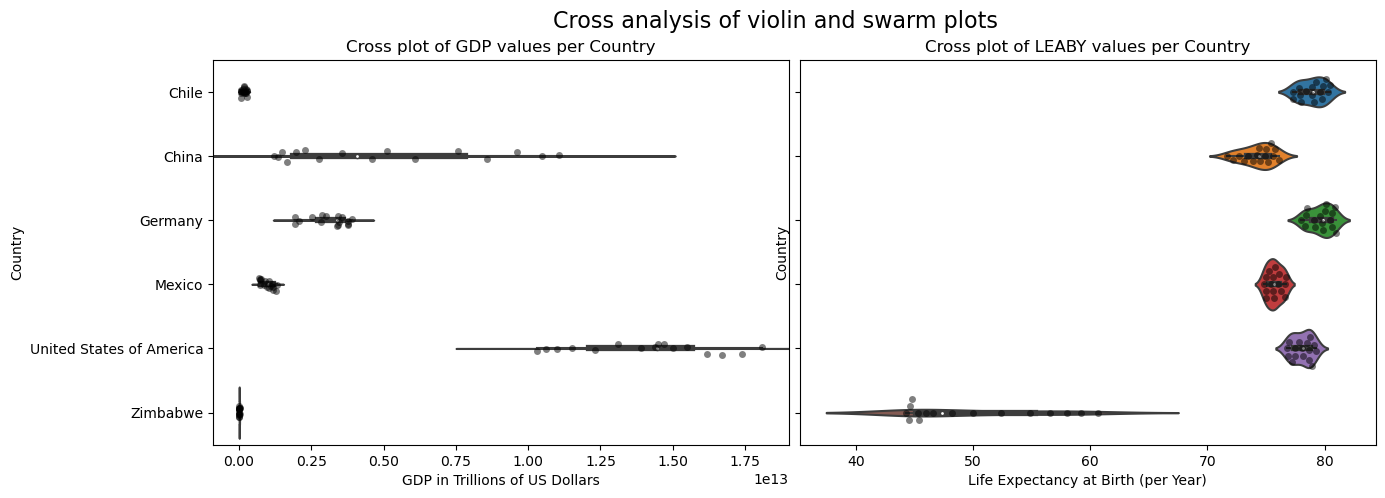

<Figure size 640x480 with 0 Axes>

In [119]:
fig, axs = plt.subplots(1, 2,sharey=True, figsize=(15, 5))
axs[0] = sns.violinplot(x=df.GDP, y=df.Country, ax=axs[0])
axs[0] = sns.stripplot(x=df.GDP, y=df.Country, ax=axs[0], color='black', alpha=.5)
axs[0].set_xlabel('GDP in Trillions of US Dollars')
axs[0].set_title('Cross plot of GDP values per Country')

axs[1] = sns.violinplot(x=df.LEABY, y=df.Country, ax=axs[1])
axs[1] = sns.swarmplot(x=df.LEABY, y=df.Country, ax=axs[1], color='black', alpha=.5)
axs[1].set_xlabel('Life Expectancy at Birth (per Year)')
axs[1].set_title('Cross plot of LEABY values per Country')
fig.suptitle('Cross analysis of violin and swarm plots',fontsize=16)
plt.subplots_adjust(wspace=0.02)
plt.show()
plt.clf()

## Line charts

### Single chart

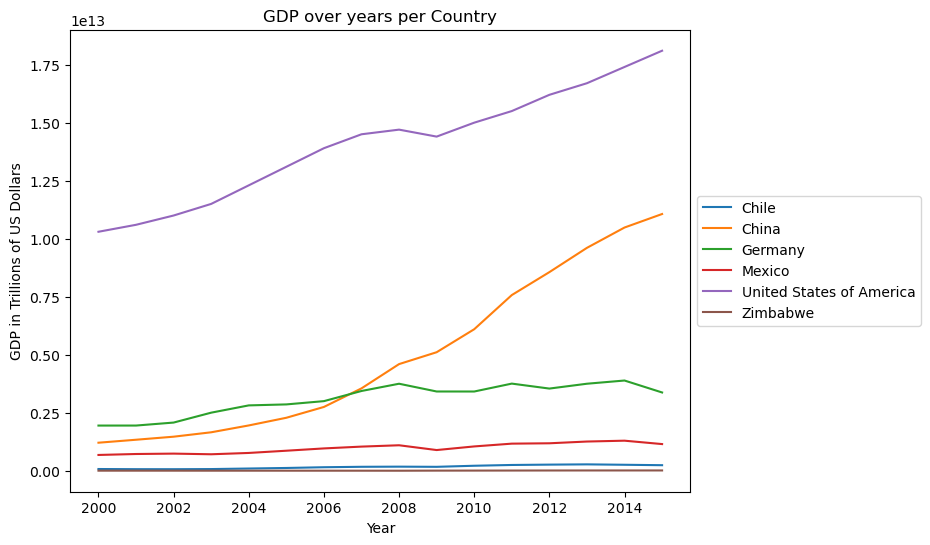

<Figure size 640x480 with 0 Axes>

In [126]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.ylabel('GDP in Trillions of US Dollars')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('GDP over years per Country')
plt.show()
plt.clf()

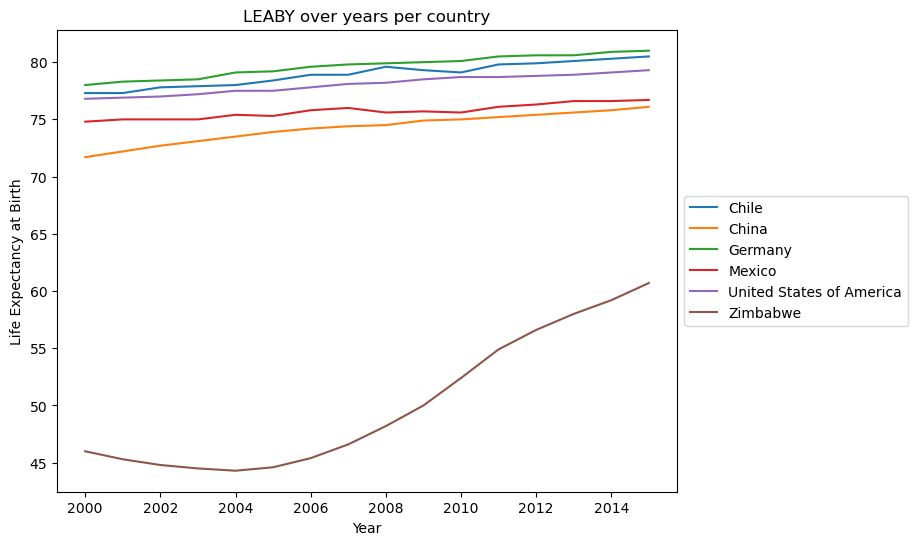

<Figure size 640x480 with 0 Axes>

In [147]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.ylabel('Life Expectancy at Birth')
plt.title('LEABY over years per country')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=1)
plt.show()
plt.clf()

### Multiple charts

/Users/laurentgagne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


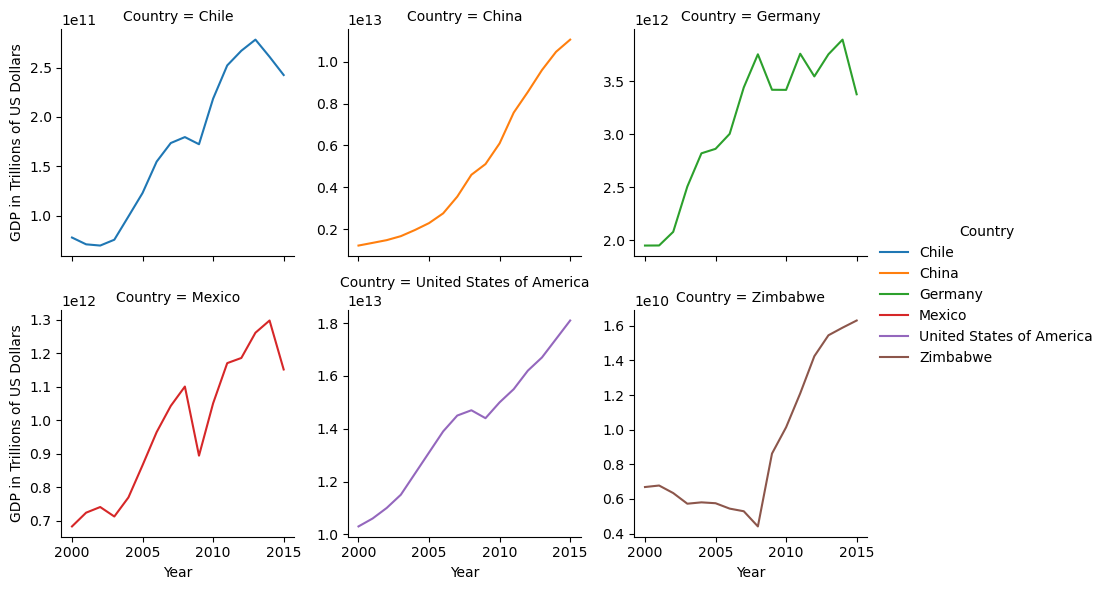

<Figure size 640x480 with 0 Axes>

In [136]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey = False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP').add_legend().set_axis_labels('Year', 'GDP in Trillions of US Dollars'))
plt.show()
plt.clf()

/Users/laurentgagne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


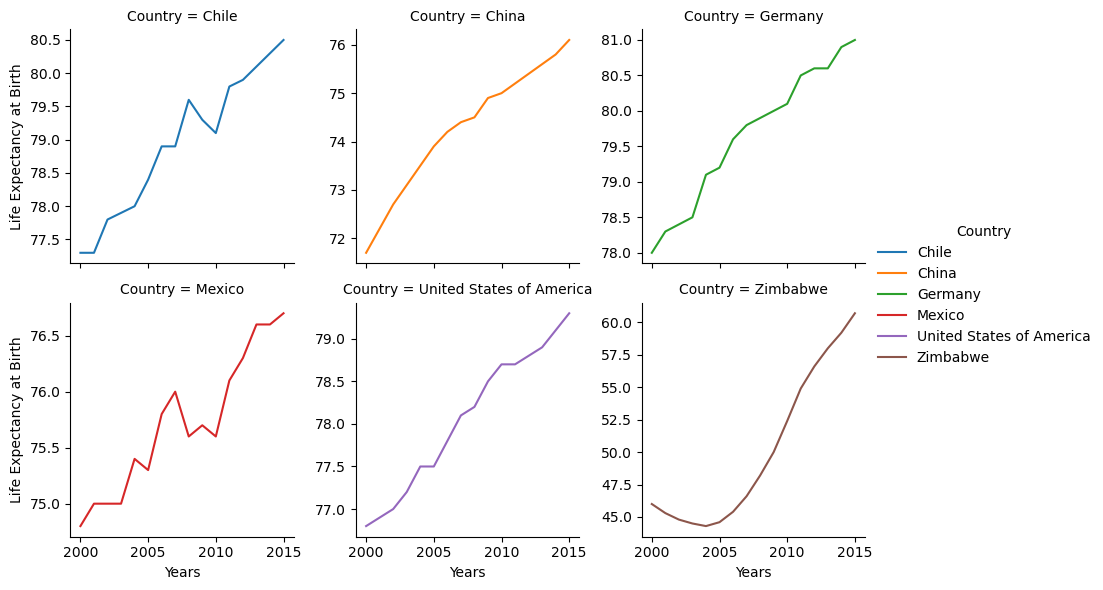

<Figure size 640x480 with 0 Axes>

In [137]:
graphLEABY = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey = False)
graphLEABY = (graphLEABY.map(sns.lineplot, 'Year', 'LEABY').add_legend().set_axis_labels('Years', 'Life Expectancy at Birth'))
plt.show()
plt.clf()

## Scatter plots

### Single chart

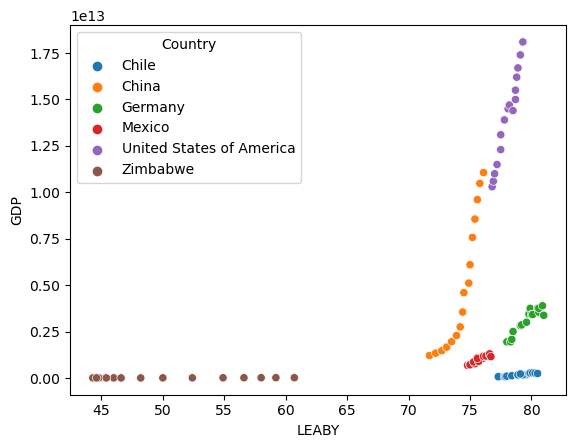

<Figure size 640x480 with 0 Axes>

In [140]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country)
plt.show()
plt.clf()

### Multiple charts

/Users/laurentgagne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


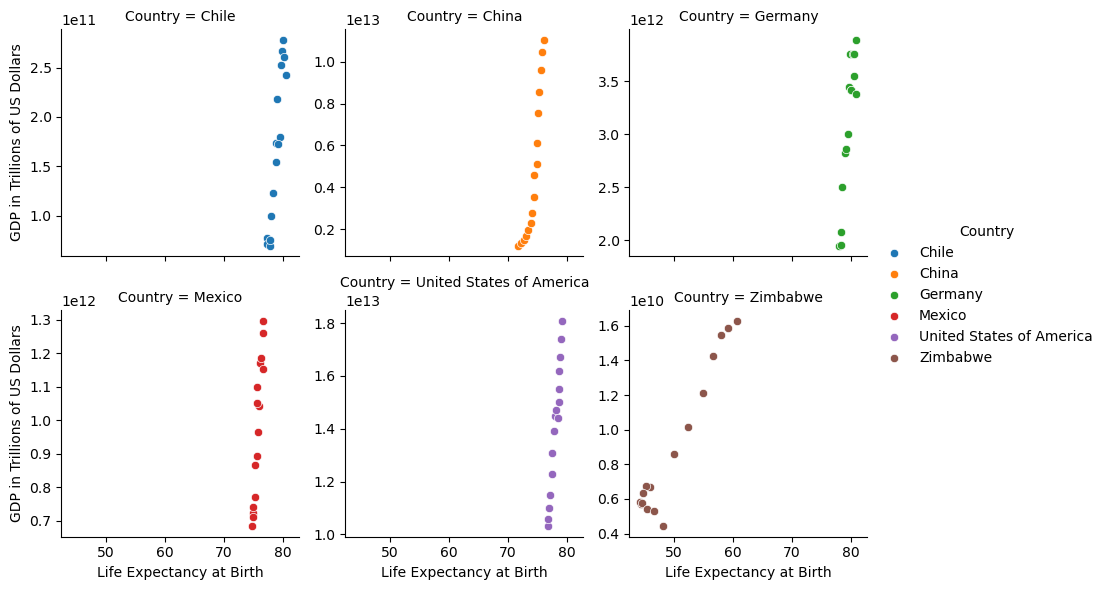

<Figure size 640x480 with 0 Axes>

In [146]:
graphScatter = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey = False)
graphScatter = (graphScatter.map(sns.scatterplot, 'LEABY', 'GDP').add_legend().set_axis_labels('Life Expectancy at Birth', 'GDP in Trillions of US Dollars'))
plt.show()
plt.clf()

## Conclusions

- Has life expectancy increased over time in the six nations?
    - Yes. The greatest increase happened in Zimbabwe.
- Has GDP increased over time in the six nations?
    - Values increased for all countries, with China and USA oustanding from the list.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, theres is a positive correlation between GDP and LEABY for these countries.
- What is the average life expectancy in these nations?
    - While for five of the countries the average is in mid to high 70s, for Zimbabwe it is 50.
- What is the distribution of that life expectancy?
    - The distribution is left-skewed, being all the data observed (or most of them) in the right area